In [2]:
import pandas as pd
import json
import numpy as np
import subprocess
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("recipes_data.csv")

In [3]:
df

,title,ingredients,directions,link,source,NER,site
0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""bite size shredded rice biscuits"", ""vanilla""...",www.cookbooks.com
1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""cream of mushroom soup"", ""beef"", ""sour cream...",www.cookbooks.com
2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""pepper"", ""cream cheese"", ""gar...",www.cookbooks.com
3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken gravy"", ""cream of mushroom soup"", ""c...",www.cookbooks.com
4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""graham cracker crumbs"", ""powdered sugar"", ""p...",www.cookbooks.com
...,...,...,...,...,...,...,...
2231137,Sunny's Fake Crepes,"[""1/2 cup chocolate hazelnut spread (recommend...","[""Spread hazelnut spread on 1 side of each tor...",www.foodnetwork.com/recipes/sunny-anderson/sun...,Recipes1M,"[""chocolate hazelnut spread"", ""marshmallows"", ...",www.foodnetwork.com
2231138,Devil Eggs,"[""1 dozen eggs"", ""1 paprika"", ""1 salt and pepp...","[""Boil eggs on medium for 30mins."", ""Then cool...",cookpad.com/us/recipes/355411-devil-eggs,Recipes1M,"[""choice"", ""miracle whip"", ""eggs"", ""relish"", ""...",cookpad.com
2231139,Extremely Easy and Quick - Namul Daikon Salad,"[""150 grams Daikon radish"", ""1 tbsp Sesame oil...","[""Julienne the daikon and squeeze out the exce...",cookpad.com/us/recipes/153324-extremely-easy-a...,Recipes1M,"[""soy sauce"", ""radish"", ""white sesame seeds"", ...",cookpad.com
2231140,Pan-Roasted Pork Chops With Apple Fritters,"[""1 cup apple cider"", ""6 tablespoons sugar"", ""...","[""In a large bowl, mix the apple cider with 4 ...",cooking.nytimes.com/recipes/1015164,Recipes1M,"[""apple cider"", ""egg"", ""sugar"", ""freshly groun...",cooking.nytimes.com


### Get best value of k

In [14]:
# vectorsize 10
# Define the base command
base_command = "spark-submit --class ca.uwaterloo.cs451.project.kmeans target/assignments-1.0.jar --input project-q1-vectors/part-00000 --output project-q1-kmeans"

for k in range(2, 11):
    # Construct the command with the current value of k
    command = f"{base_command} --k {k}"

    # Run the command and capture the output
    result = subprocess.run(command, shell=True, capture_output=True, text=True)

    # Save the output to a text file named based on the k value
    log_file = f"log_k{k}.txt"
    with open(log_file, "w") as f:
        f.write(result.stdout)

    print(f"Output for k={k} saved to {log_file}")


Output for k=1 saved to log_k1.txt


In [21]:
# Grep the silhouette score from the log files
silhouette_scores = []
for k in range(2, 11):
    log_file = f"log_k{k}.txt"
    grep_command = f"grep 'Silhouette' {log_file}"
    grep_result = subprocess.run(grep_command, shell=True, capture_output=True, text=True)
    silhouette_scores.append(grep_result.stdout.strip().split("=")[-1])
    print(f"k={k}: {grep_result.stdout.strip()}")


k=2: Silhouette with squared euclidean distance = 0.5680500615167653
k=3: Silhouette with squared euclidean distance = 0.39065800925026456
k=4: Silhouette with squared euclidean distance = 0.3882442912396226
k=5: Silhouette with squared euclidean distance = 0.36394324107141546
k=6: Silhouette with squared euclidean distance = 0.34032317297679837
k=7: Silhouette with squared euclidean distance = 0.3049616059097936
k=8: Silhouette with squared euclidean distance = 0.2763041937497998
k=9: Silhouette with squared euclidean distance = 0.2686310988535305
k=10: Silhouette with squared euclidean distance = 0.2610887254516355


In [22]:
silhouette_scores = [float(x.strip()) for x in silhouette_scores]
silhouette_scores


[0.5680500615167653,
 0.39065800925026456,
 0.3882442912396226,
 0.36394324107141546,
 0.34032317297679837,
 0.3049616059097936,
 0.2763041937497998,
 0.2686310988535305,
 0.2610887254516355]

Text(0, 0.5, 'Silhouette coefficient')

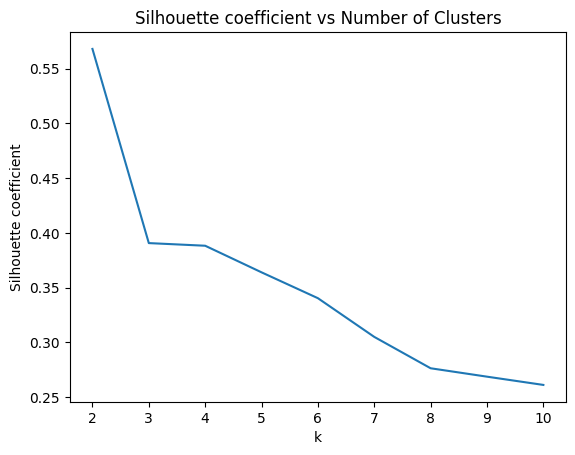

In [24]:
plt.plot(range(2,11),silhouette_scores)
plt.title("Silhouette coefficient vs Number of Clusters")
plt.xlabel("k")
plt.ylabel("Silhouette coefficient")

### Get cluster data

In [17]:
df

,title,ingredients,directions,link,source,NER,site
0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""bite size shredded rice biscuits"", ""vanilla""...",www.cookbooks.com
1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""cream of mushroom soup"", ""beef"", ""sour cream...",www.cookbooks.com
2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""pepper"", ""cream cheese"", ""gar...",www.cookbooks.com
3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken gravy"", ""cream of mushroom soup"", ""c...",www.cookbooks.com
4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""graham cracker crumbs"", ""powdered sugar"", ""p...",www.cookbooks.com
...,...,...,...,...,...,...,...
2231137,Sunny's Fake Crepes,"[""1/2 cup chocolate hazelnut spread (recommend...","[""Spread hazelnut spread on 1 side of each tor...",www.foodnetwork.com/recipes/sunny-anderson/sun...,Recipes1M,"[""chocolate hazelnut spread"", ""marshmallows"", ...",www.foodnetwork.com
2231138,Devil Eggs,"[""1 dozen eggs"", ""1 paprika"", ""1 salt and pepp...","[""Boil eggs on medium for 30mins."", ""Then cool...",cookpad.com/us/recipes/355411-devil-eggs,Recipes1M,"[""choice"", ""miracle whip"", ""eggs"", ""relish"", ""...",cookpad.com
2231139,Extremely Easy and Quick - Namul Daikon Salad,"[""150 grams Daikon radish"", ""1 tbsp Sesame oil...","[""Julienne the daikon and squeeze out the exce...",cookpad.com/us/recipes/153324-extremely-easy-a...,Recipes1M,"[""soy sauce"", ""radish"", ""white sesame seeds"", ...",cookpad.com
2231140,Pan-Roasted Pork Chops With Apple Fritters,"[""1 cup apple cider"", ""6 tablespoons sugar"", ""...","[""In a large bowl, mix the apple cider with 4 ...",cooking.nytimes.com/recipes/1015164,Recipes1M,"[""apple cider"", ""egg"", ""sugar"", ""freshly groun...",cooking.nytimes.com


In [18]:
cluster_out_path = "project-q1-kmeans/part-00000-2ba5ab5f-a167-46bc-ac80-3939d8634155-c000.json"
with open(cluster_out_path,'r') as json_file:
    
    data = json_file.read()

json_objects = data.split('\n')

clusters = []

for obj in json_objects:
    if obj.strip():  # Skip empty lines
        parsed_obj = json.loads(obj)

        # features = parsed_obj['features']
        # feature_type = features['type']
        # feature_values = features['values']
        prediction = parsed_obj['prediction']
        clusters.append(prediction)

        # print(f"Feature Type: {feature_type}")
        # print(f"Feature Values: {feature_values}")
        # print(f"Prediction: {prediction}")
        # print()

In [20]:
clusters[:5]

[1, 0, 0, 0, 1]

In [21]:
df['cluster'] = clusters

In [47]:
df.query("cluster == 1")['title'].to_csv("project-data/Cluster_1.csv",index=False)

In [48]:
df.query("cluster == 0")['title'].to_csv("project-data/Cluster_0.csv",index=False)

### Save transformed csv

In [22]:
limit = 10000
df.head(limit).to_csv("project-data/transformed_sample.csv",index = False)

### Save dish titles

In [41]:
df.head()

,title,ingredients,directions,link,source,NER,site,cluster
0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""bite size shredded rice biscuits"", ""vanilla""...",www.cookbooks.com,1
1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""cream of mushroom soup"", ""beef"", ""sour cream...",www.cookbooks.com,0
2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""pepper"", ""cream cheese"", ""gar...",www.cookbooks.com,0
3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken gravy"", ""cream of mushroom soup"", ""c...",www.cookbooks.com,0
4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""graham cracker crumbs"", ""powdered sugar"", ""p...",www.cookbooks.com,1


In [24]:
df.title.head(limit).to_csv("project-data/dishes.csv",index=False)

In [25]:
pd.read_csv("project-data/dishes.csv")

,title
0,No-Bake Nut Cookies
1,Jewell Ball'S Chicken
2,Creamy Corn
3,Chicken Funny
4,Reeses Cups(Candy)
...,...
9995,Pink Fruit Salad
9996,Peppered Steak
9997,Chicken Casserole
9998,Sweet Potatoes Casserole


### Save master ingredients

In [40]:
master_ingredients = list(set(x for sublst in df['NER'].to_list()[:limit] for x in eval(sublst)))

In [41]:
len(master_ingredients)

3969

In [42]:
len(df)

2231142

In [43]:
with open('project-data/master-ingredients.txt','w') as file:
    for item in master_ingredients:
        file.write(item+'\n')


### EDA

In [7]:
lengths = df['NER'].apply(lambda x: len(eval(x)))

In [11]:
min(lengths),max(lengths),np.median(lengths),np.mean(lengths)

(0, 167, 8.0, 8.255830422268058)

In [25]:
lengths_1 = df['ingredients'].apply(lambda x: len(eval(x)))


In [26]:
min(lengths_1),max(lengths_1),np.median(lengths_1),np.mean(lengths_1)


(1, 407, 8.0, 8.727042474212757)

### Explore associationRules

In [33]:
association_rule_out_path = "project-q2-itemsetassociationRules/part-00000-5d722576-7666-4ada-8636-2d51657716af-c000.json"
with open(association_rule_out_path,'r') as json_file:
    
    a_rule_data = json_file.read()

a_rules_json_objects = [json.loads(line) for line in a_rule_data.splitlines()]
rules_df = pd.json_normalize(a_rules_json_objects)


In [40]:
rules_df

,antecedent,consequent,confidence
0,"[sugar, butter, salt]",[ flour],0.657303
1,"[sugar, butter, salt]",[ eggs],0.617727
2,"[ baking powder, baking soda, salt]",[ flour],0.801537
3,"[ garlic, salt]",[ parsley],0.137054
4,"[ garlic, salt]",[ water],0.183931
...,...,...,...
1146,"[ brown sugar, butter, salt]",[ flour],0.674412
1147,[ tomatoes],[ olive oil],0.248785
1148,[ tomatoes],[ garlic],0.446530
1149,[ tomatoes],[ onion],0.405890


In [39]:
rules_df.sort_values('confidence',ascending=False).reset_index(drop=True).to_csv("project-data/associationRules.csv",index=False)